## Cat detection : Using a single neuron

### The  main objective of this project is to explain all the concepts/phases involved in the neural network

## Loading the packages and dataset

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline
    
    
def load_dataset():
    train_dataset = h5py.File('Cat_dataset/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('Cat_dataset/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [13]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

## Dataset dimensions and its features
##### There are 209 images in the train dataset. These are coloured images, hence three dimensional (i.e RGB) and each diemnsion is 64*64

In [171]:
print(train_set_x_orig.shape)
print(test_set_x_orig.shape)
print(train_set_y.shape)
print(test_set_y.shape)

(209, 64, 64, 3)
(50, 64, 64, 3)
(1, 209)
(1, 50)


## Plotting any image from train dataset uisng index

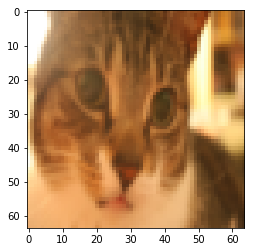

In [268]:
plt.imshow(train_set_x_orig[200])

## Flattening the images and then centering them

In [173]:
train_set_x_flattened = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flattened = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T

In [174]:
print(train_set_x_flattened.shape)
print(test_set_x_flattened.shape)

(12288, 209)
(12288, 50)


In [175]:
train_X = train_set_x_flattened/255
test_X = test_set_x_flattened/255

## Setting up the basic functions and parameters

In [269]:
# Defining the activation function
def activation_func(z):
    sigma = 1/(1+np.exp(-z))
    return sigma

# Initializing the parameters (weights & bias)
def initializing_params(X,bias):
    w = np.zeros((X.shape[0],1))
    b=bias
    return w,b
# Forward Propgation through NN to get cost and gradients
def forward_prop(w,b,X,Y):
    m = X.shape[1]
    Z = np.dot(w.transpose(),X) + b       # Calculating w*X +b
    A = activation_func(Z)                # passing w*X +b to activation function
    cost = -np.sum((Y*np.log(A) + (1-Y)*np.log(1-A)))/m  # Calculating the current cost
    dw = np.dot(X,(A-Y).transpose())/m    # Calculating the current gradient of parameter 'w'
    db = np.sum((A-Y))/m 
    
    return cost,dw,db

# Looping through the NN layer to find optimized parameters (i.e.weights and bias )
def optimize_parameters(w, b, X, Y, num_iterations, learning_rate, print_cost):
    costs = []
    for i in range(num_iterations):
        cost,dw,db = forward_prop(w, b, X, Y)
        w = w - (learning_rate*dw)
        b = b - (learning_rate*db)
      
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    final_params = {"w": w,
              "b": b}
    
    Current_grads = {"dw": dw,
             "db": db}
    
    return final_params, Current_grads, costs

# Predict the cases using the final optimized parameters
def predict(final_w, final_b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = final_w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = activation_func(np.dot(final_w.transpose(),X)+final_b)
        
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if A[0,i]>0.5:
            Y_prediction[0,i]=1
        else:
            Y_prediction[0,i]=0
   
    return Y_prediction

### All basic building blocks (functions) are ready. Below chunk will call them in proper order to get the predictions

In [238]:
# Step 1 : Initializing the weights and bias
w,b = initializing_params(train_X,0)

# Step 2: Finding the optimized weights and bias after multiple iterations using gradient descent and proper learning rate 
final_params, Current_grads, costs = optimize_parameters(w, b, train_X, train_set_y, 1000, 0.005, True)

# Prediction using the parameters obtained in above step
yhat = predict(final_params["w"],final_params["b"],train_X)

# Accuracy on train set
Accurcay = 100*(1-np.mean(abs(train_set_y-yhat)))
print('\n****  Training set accuracy: ' + str(Accurcay)  + '   ***\n')

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004

****  Training set accuracy: 96.65071770334929   ***



### Plotting the cost function

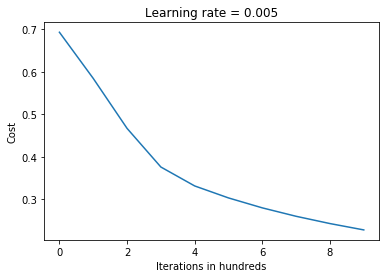

In [242]:
plt.plot(costs)
plt.xlabel('Iterations in hundreds')
plt.ylabel('Cost')
plt.title('Learning rate = 0.005')

## Applying the model on test data set

In [254]:
model_w = final_params['w']
model_b= final_params['b']
test_yhat = predict(model_w,model_b,test_X)
Test_accuracy = 100*(1-np.mean(abs(test_yhat-test_set_y)))
print('\n***   ' + 'Test_accuracy : ' + str(Test_accuracy) + '  ***\n')


***   Test_accuracy : 72.0  ***

